In [101]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from transformers import BertModel
import torch

In [9]:
# read csv
df = pd.read_csv("../hate-speech-detection-using-chatgpt/csv/labeled_data_preprocessed_without_url.csv")
df.columns = ['label', 'tweet']
columns = df.columns

In [12]:
labels, tweets = list(df.label.values), list(df.tweet.values)

# 1. TF-IDF t-SNE

In [32]:
vect = TfidfVectorizer()
data = vect.fit_transform(tweets).toarray()

In [35]:
plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 13.798459   43.723156 ]
 [ -0.6372076  49.89998  ]
 [-13.28454    21.243818 ]
 ...
 [-26.797428   27.931267 ]
 [ 55.62351    -4.2514176]
 [-32.418484   30.497717 ]]


In [87]:
def t_sne(data_tsne, labels):
    plt.figure(figsize=(20,20))
    plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
    plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)

    # hate - offensive - neutral
    color = ['darkviolet', 'green', 'red']
    size = 4

    for i in range(len(data)):
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color[labels[i]], s=size)

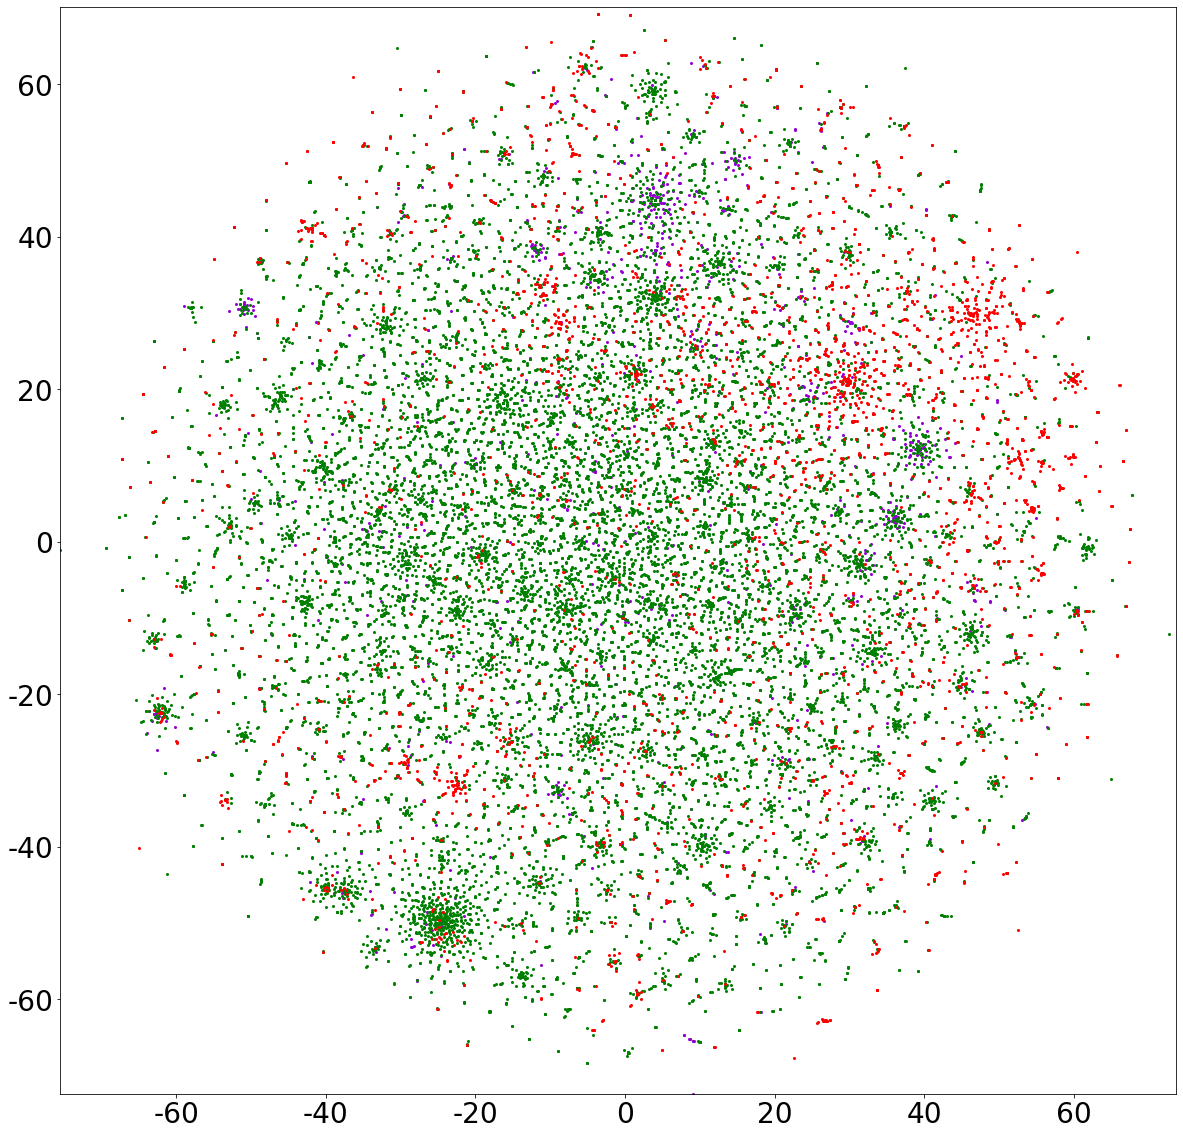

In [88]:
t_sne(data_tsne, labels)

# 2. BERT t-SNE

In [90]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [91]:
result = tokenizer(tweets, pad_to_max_length=True, truncation=True, max_length=256, return_tensors='pt')
input_ids = result['input_ids']
attention_masks = result['attention_mask']

/home/mykim/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2301: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [115]:
data = []

In [116]:
for i in range(len(tweets)):
    inputs = {'input_ids': input_ids[i].unsqueeze(0),
              'attention_mask': attention_masks[i].unsqueeze(0)}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    data.append(np.array(outputs.pooler_output.squeeze(0)))

In [120]:
plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

[[-13.931446  -32.51481  ]
 [-43.363926   19.021767 ]
 [-38.1591     21.932285 ]
 ...
 [ 10.954612   -2.1855004]
 [-38.18762     8.548421 ]
 [ 47.725716  -16.403059 ]]


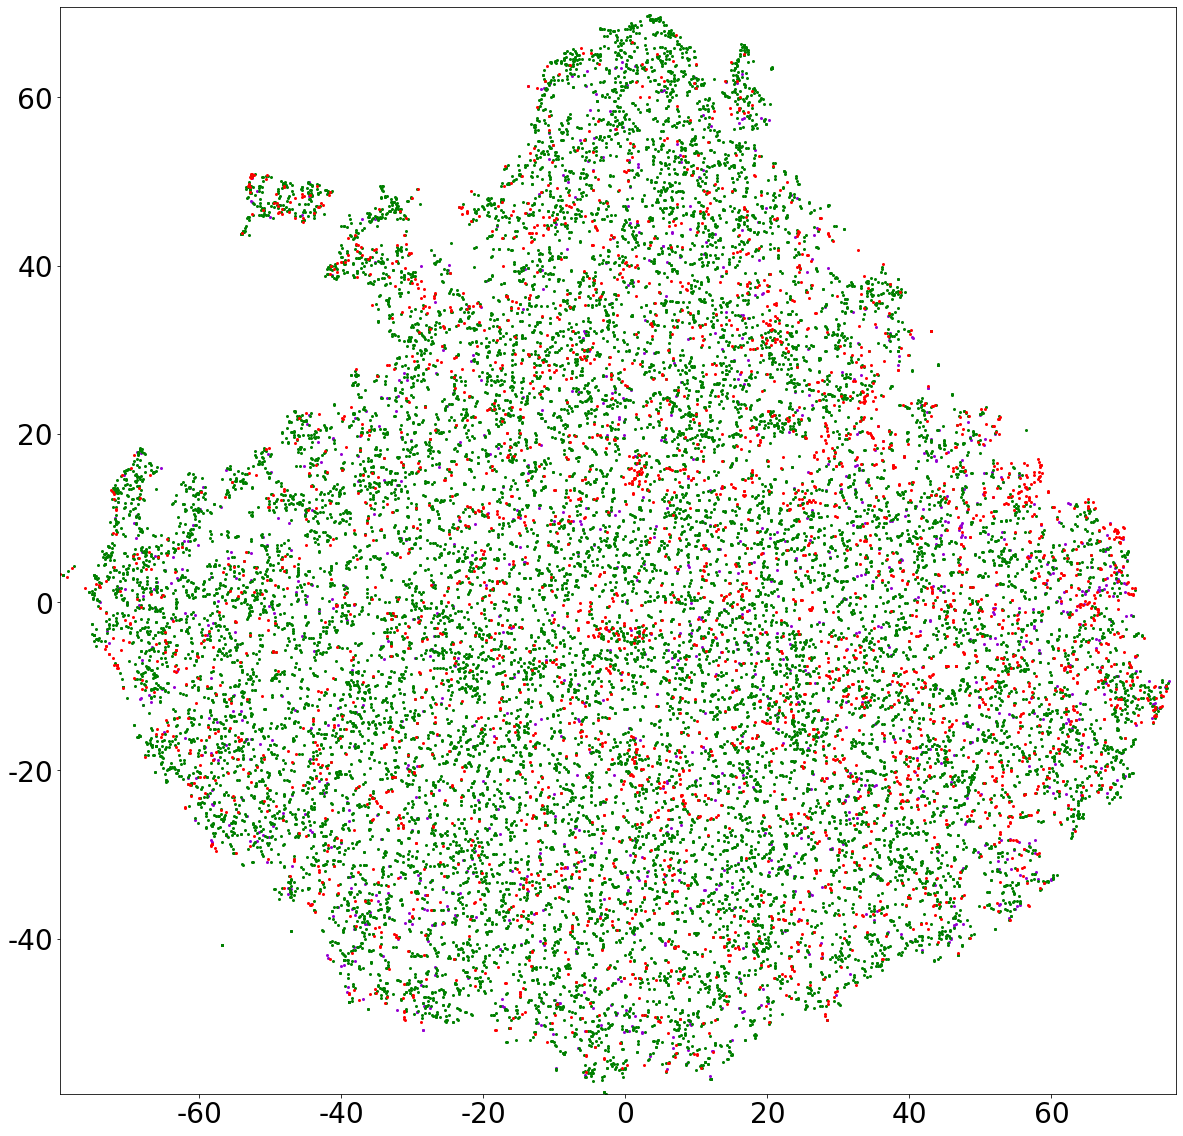

In [121]:
t_sne(data_tsne, labels)